# Setup and Context


### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).


### Import Statements

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [22]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [23]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration


In [24]:
print(df_yearly.shape)
df_yearly

(12, 4)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [25]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [26]:
df_yearly.year.values

array([1841, 1842, 1843, 1844, 1845, 1846, 1841, 1842, 1843, 1844, 1845,
       1846], dtype=int64)

In [27]:
print(df_monthly.shape)
df_monthly

(98, 3)


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [28]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [29]:
df_monthly.date.values

array(['1841-01-01T00:00:00.000000000', '1841-02-01T00:00:00.000000000',
       '1841-03-01T00:00:00.000000000', '1841-04-01T00:00:00.000000000',
       '1841-05-01T00:00:00.000000000', '1841-06-01T00:00:00.000000000',
       '1841-07-01T00:00:00.000000000', '1841-08-01T00:00:00.000000000',
       '1841-09-01T00:00:00.000000000', '1841-10-01T00:00:00.000000000',
       '1841-11-01T00:00:00.000000000', '1842-01-01T00:00:00.000000000',
       '1842-02-01T00:00:00.000000000', '1842-03-01T00:00:00.000000000',
       '1842-04-01T00:00:00.000000000', '1842-05-01T00:00:00.000000000',
       '1842-06-01T00:00:00.000000000', '1842-07-01T00:00:00.000000000',
       '1842-08-01T00:00:00.000000000', '1842-09-01T00:00:00.000000000',
       '1842-10-01T00:00:00.000000000', '1842-11-01T00:00:00.000000000',
       '1842-12-01T00:00:00.000000000', '1843-01-01T00:00:00.000000000',
       '1843-02-01T00:00:00.000000000', '1843-03-01T00:00:00.000000000',
       '1843-04-01T00:00:00.000000000', '1843-05-01

### Check for Nan Values and Duplicates

In [30]:
print(f'There are NaN values yearly  : {df_yearly.isna().values.any()}')
print(f'There are NaN values monthly : {df_monthly.isna().values.any()}')

There are NaN values yearly  : False
There are NaN values monthly : False


In [31]:
print(f'There are duplicate values yearly  : {df_yearly.duplicated().values.any()}')
print(f'There are duplicate values monthly : {df_monthly.duplicated().values.any()}')

There are duplicate values yearly  : False
There are duplicate values monthly : False


### Descriptive Statistics

In [32]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [33]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 


In [34]:
dth_pct = round(df_yearly.deaths.sum() / df_yearly.births.sum() * 100, 2)

In [35]:
print(f'The death in childbirth percentage was {dth_pct} %')

The death in childbirth percentage was 7.08 %


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

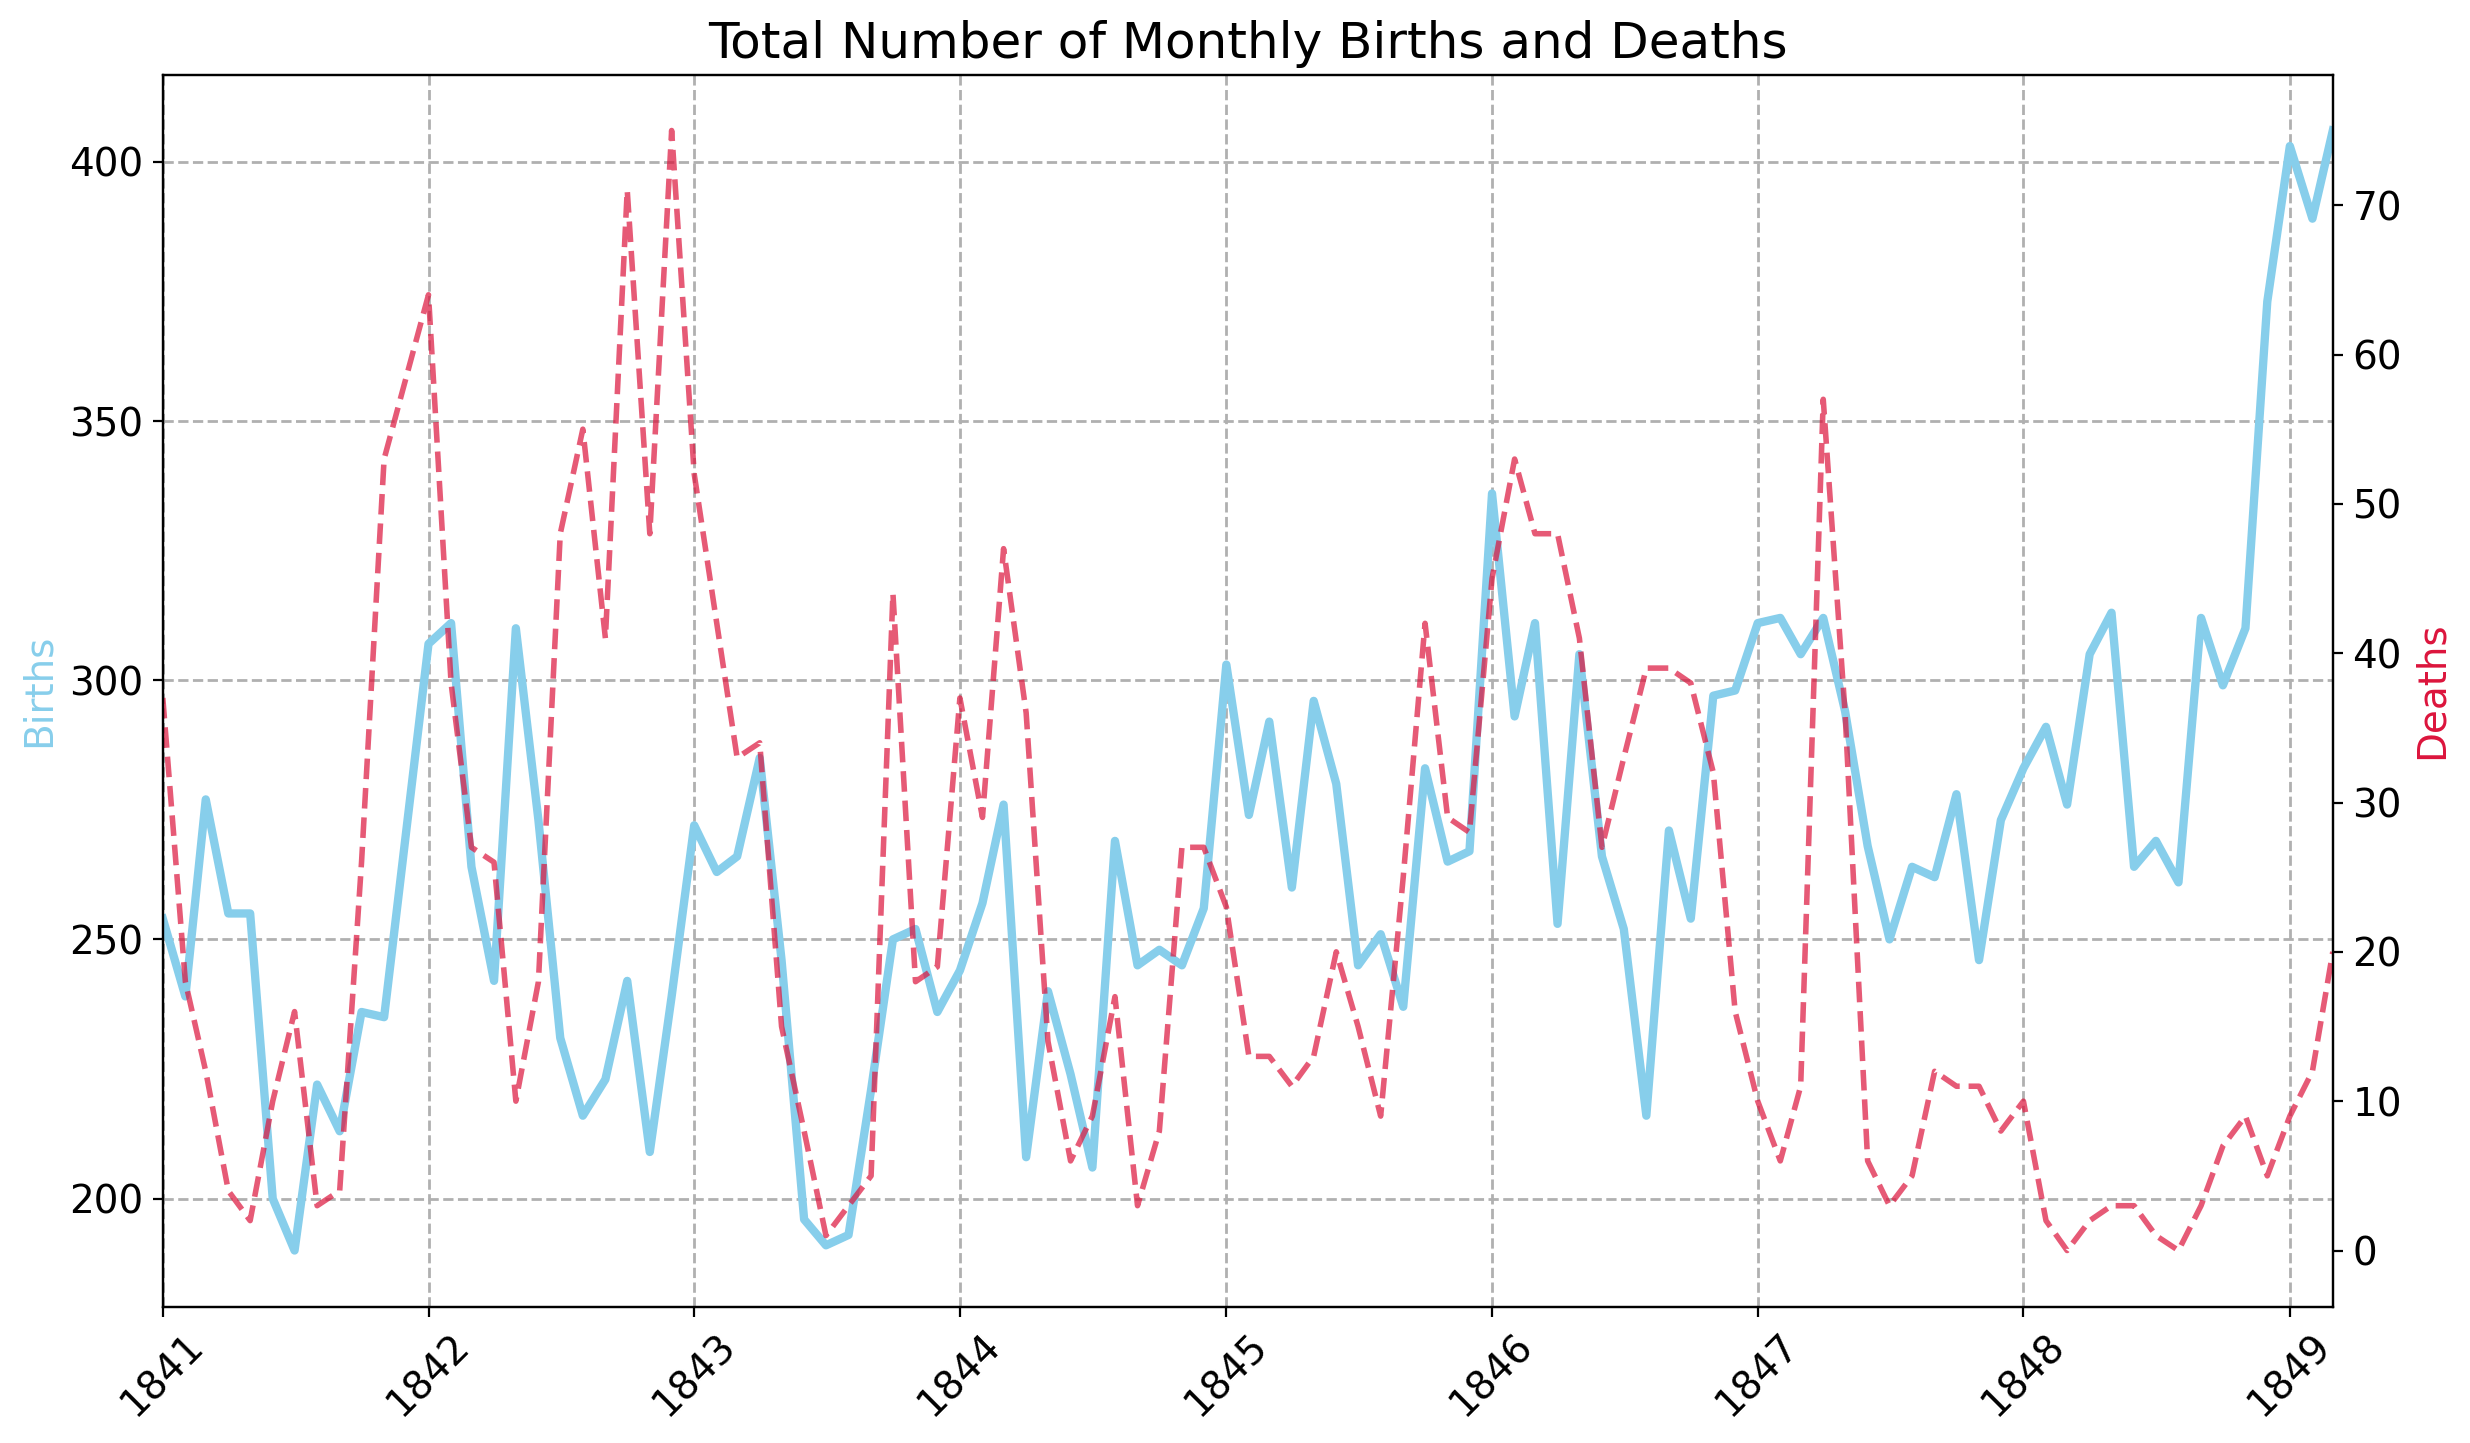

In [36]:
plt.figure(figsize = (14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize = 18)

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

plt.yticks(fontsize = 14) #without this my ax2 yticks were not enlarged.


ax1.set_ylabel('Births', fontsize = 14, color = 'skyblue')
ax2.set_ylabel('Deaths', fontsize = 14, color = 'Crimson')

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color = 'skyblue', 
         linewidth = 3)

ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color = 'crimson', 
         linewidth = 2, 
         linestyle = '--', 
         alpha = 0.7)

ax1.grid(True, linestyle = '--', linewidth = 1 )

plt.show()

## Adding the x axis tickmarks :

In [37]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

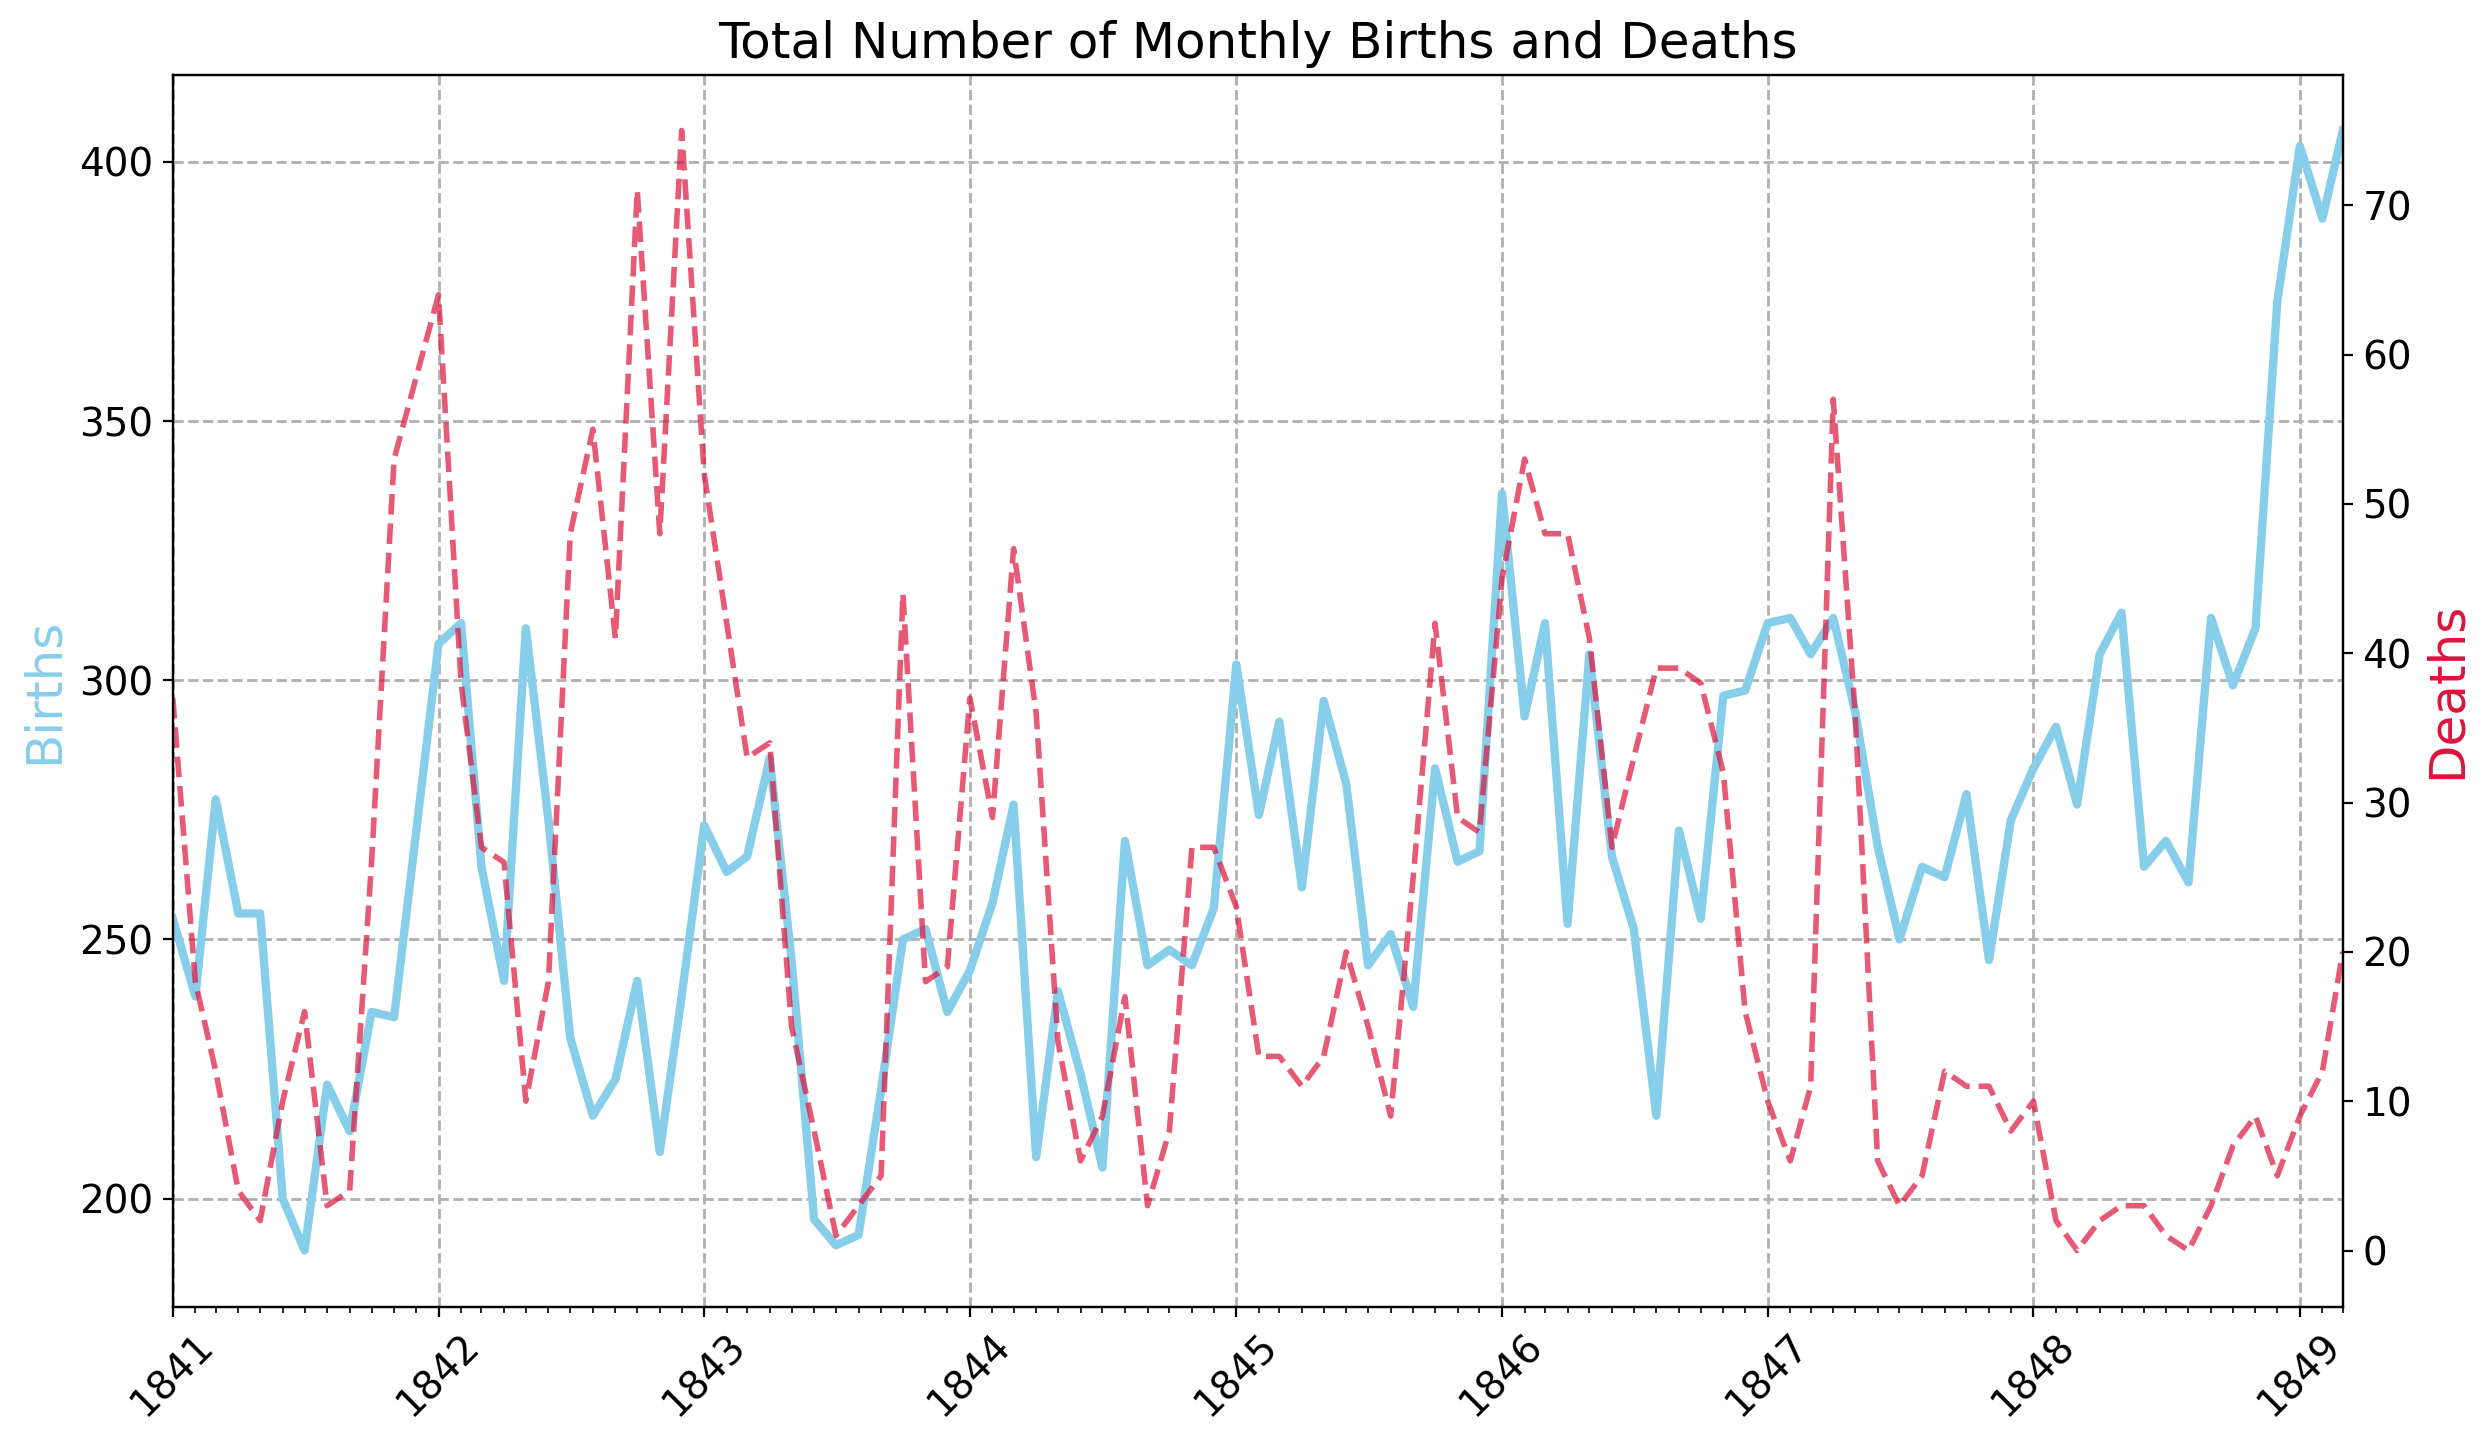

In [38]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.yticks(fontsize = 14) # ax2 font size hack.

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.grid(True, linestyle = '--', linewidth = 1 )
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--',
         alpha = 0.7)
 
plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

In [39]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [40]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [41]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [42]:
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [43]:
clinic1 = df_yearly[df_yearly.clinic == 'clinic 1']

In [44]:
clinic1

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11


In [45]:
clinic2 = df_yearly[df_yearly.clinic == 'clinic 2']

In [46]:
clinic2

,year,births,deaths,clinic,pct_deaths
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02
10,1845,3241,66,clinic 2,0.02
11,1846,3754,105,clinic 2,0.03


In [47]:
avg_c1 = clinic1.deaths.sum() / clinic1.births.sum() * 100

In [48]:
avg_c2 = clinic2.deaths.sum() / clinic2.births.sum() * 100

In [49]:
print(f'The average death rate in clinic 1 is {round(avg_c1, 3)}%')

The average death rate in clinic 1 is 9.924%


In [50]:
print(f'The average death rate in clinic 2 is {round(avg_c2, 3)}%')

The average death rate in clinic 2 is 3.884%


### Plotting the Proportion of Yearly Deaths by Clinic

In [51]:
line = px.line(df_yearly,
               x = 'year',
               y = 'pct_deaths',
               color = 'clinic',
               title = 'Proportion of Yearly Deaths by Clinic')
line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [52]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [53]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [54]:
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
93,1848-11-01,310,9,0.03
94,1848-12-01,373,5,0.01
95,1849-01-01,403,9,0.02
96,1849-02-01,389,12,0.03


In [55]:
before_washing = df_monthly[df_monthly.date < handwashing_start]

In [56]:
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [57]:
before_washing

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01
...,...,...,...,...
71,1847-01-01,311,10,0.03
72,1847-02-01,312,6,0.02
73,1847-03-01,305,11,0.04
74,1847-04-01,312,57,0.18


In [58]:
after_washing

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,0.02
77,1847-07-01,250,3,0.01
78,1847-08-01,264,5,0.02
79,1847-09-01,262,12,0.05
80,1847-10-01,278,11,0.04
81,1847-11-01,246,11,0.04
82,1847-12-01,273,8,0.03
83,1848-01-01,283,10,0.04
84,1848-02-01,291,2,0.01
85,1848-03-01,276,0,0.00


In [59]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100

In [60]:
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100

In [61]:
print(f'The percentage of deaths before 1847 was {bw_rate:.4}%')

The percentage of deaths before 1847 was 10.53%


In [62]:
print(f'The percentage of deaths after 1847 was {aw_rate:.3}%')

The percentage of deaths after 1847 was 2.15%


### Calculate a Rolling Average of the Death Rate

In [63]:
roll_df = before_washing.set_index('date')

In [64]:
roll_df = roll_df.rolling(window=6).mean()

In [65]:
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


### Highlighting Subsections of a Line Chart


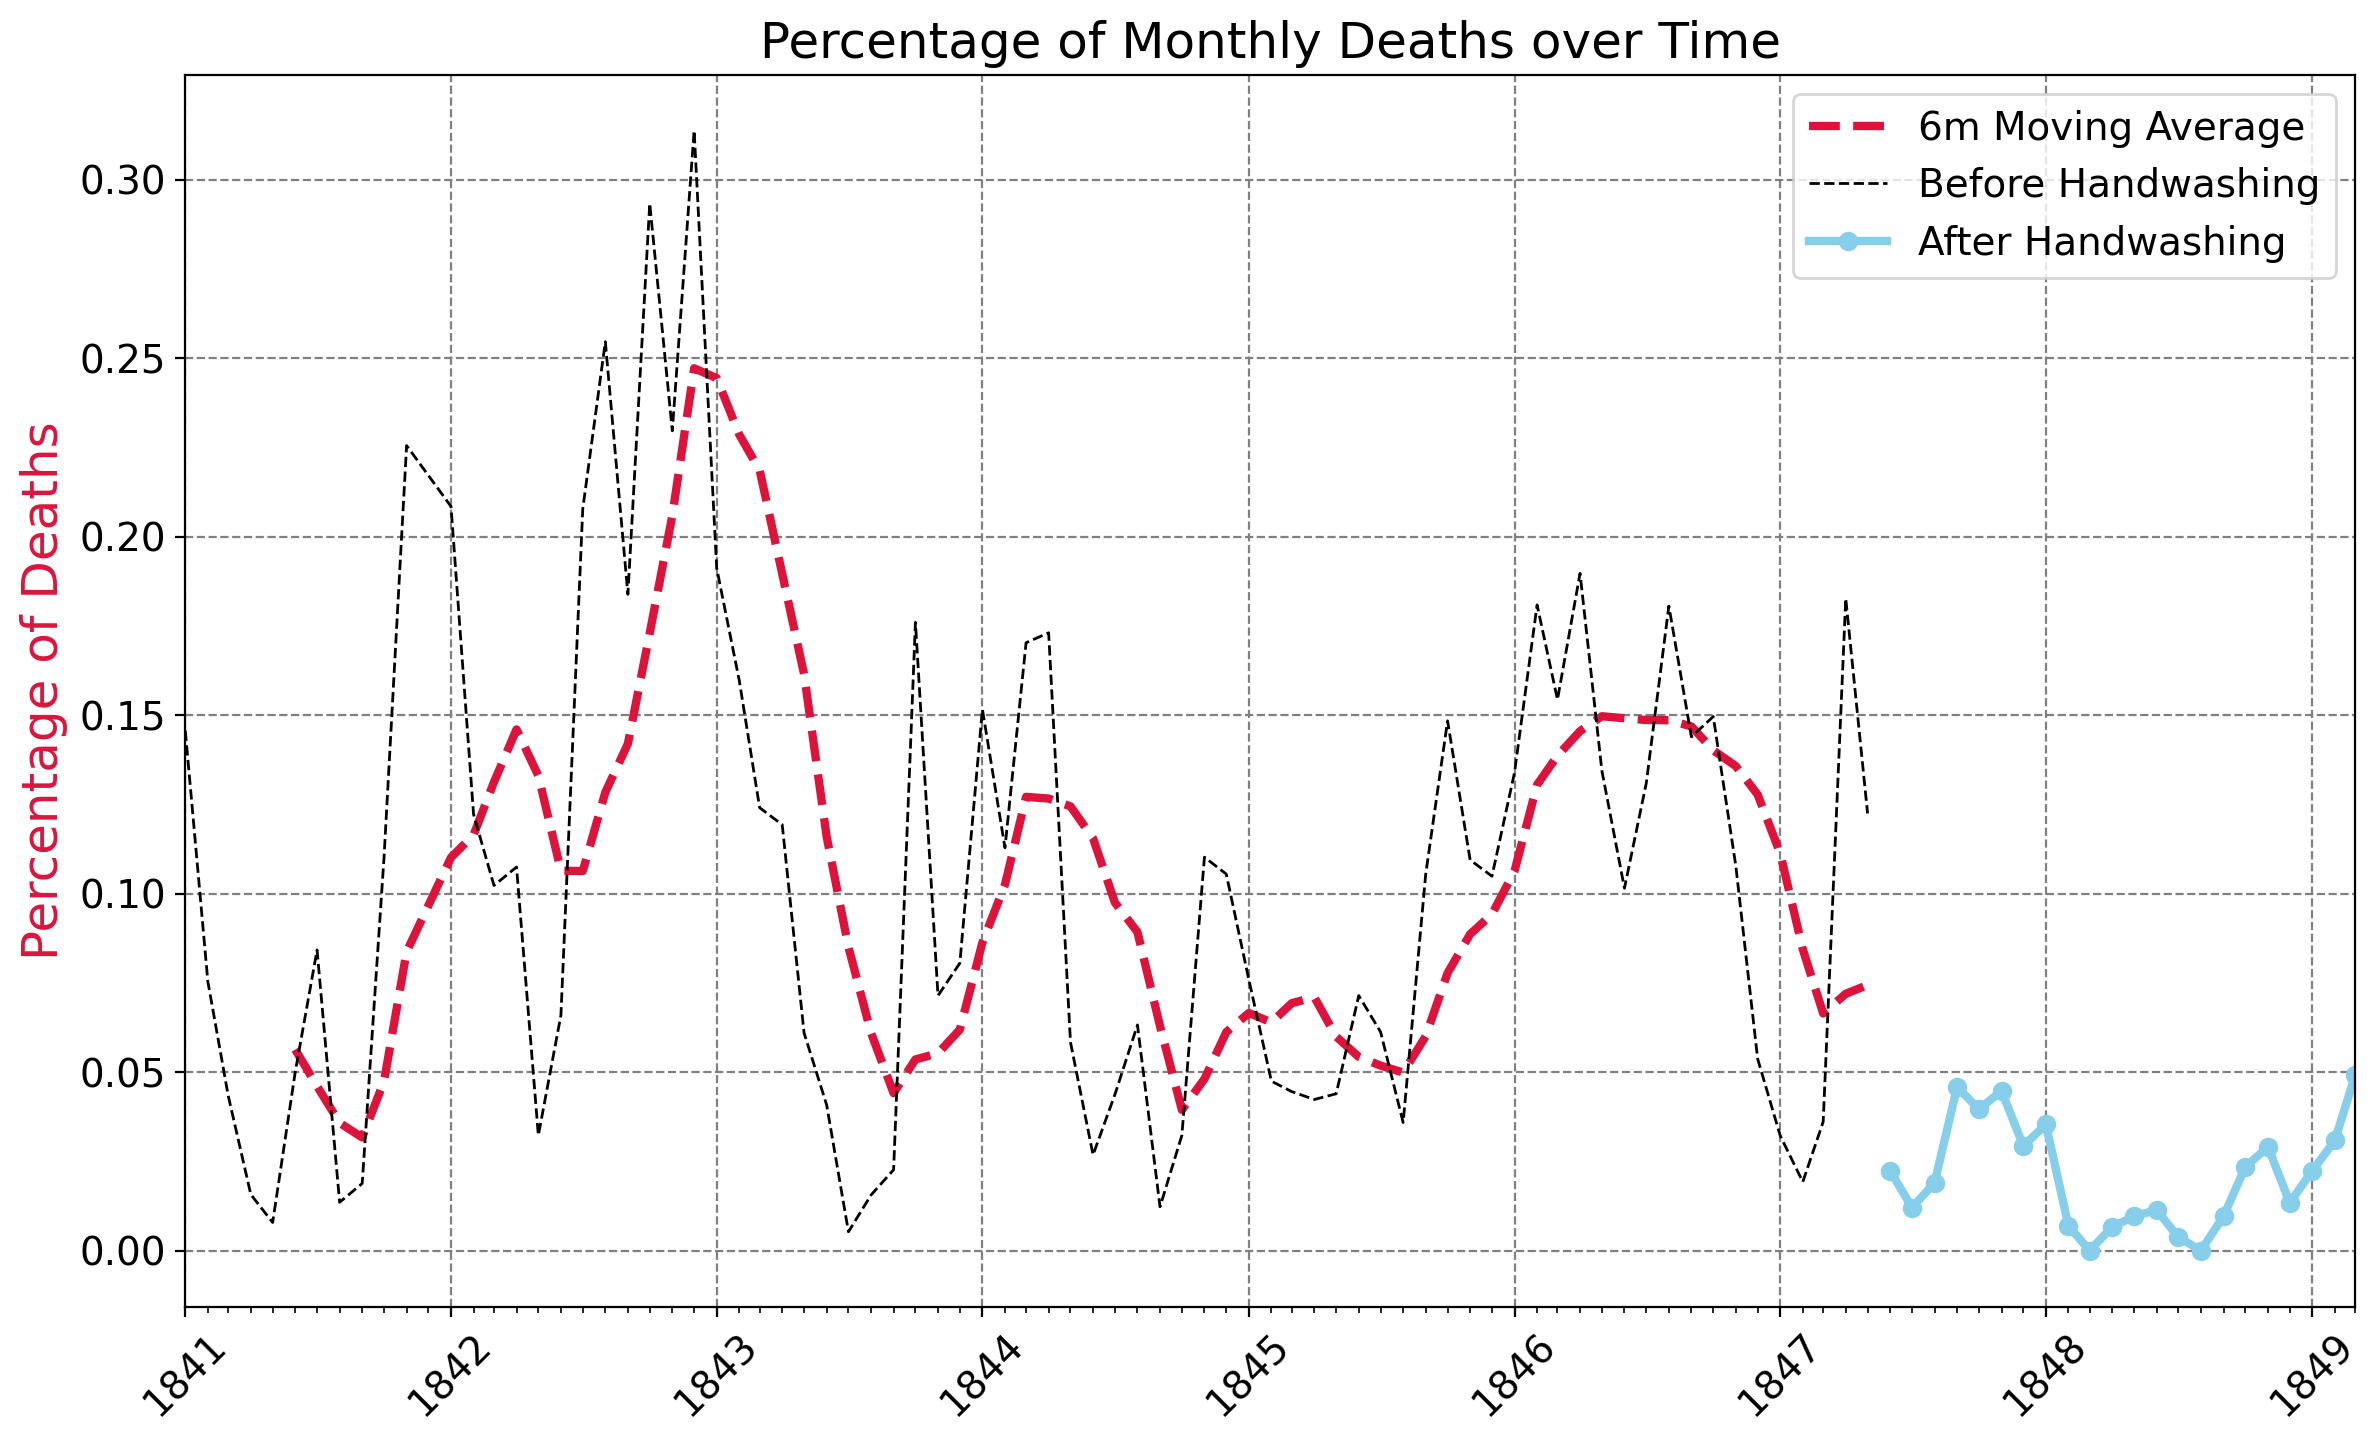

In [66]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=14)
 
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate


In [67]:
avg_prob_before = before_washing.pct_deaths.mean() * 100

In [68]:
print(f'The chance of death during childbirth before handwashing was {avg_prob_before:.3}%')

The chance of death during childbirth before handwashing was 10.5%


In [69]:
avg_prob_after = after_washing.pct_deaths.mean() * 100

In [70]:
print(f'The chance of death during childbirth after handwashing was {avg_prob_after:.3}%')

The chance of death during childbirth after handwashing was 2.11%


In [71]:
mean_diff = avg_prob_before - avg_prob_after

In [72]:
print(f'Handwashing reduced the risk of dying in childbirth by {mean_diff:.3}%')

Handwashing reduced the risk of dying in childbirth by 8.4%


In [73]:
times = avg_prob_before / avg_prob_after

In [74]:
print(f'This is a x{round(times)} improvement')

This is a x5 improvement


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing



In [75]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [76]:
box = px.box(df_monthly,
             x = 'washing_hands',
             y = 'pct_deaths',
             color = 'washing_hands',
             title = 'How Has Handwashing Affect Deathcount')

box.update_layout(xaxis_title = 'Washing Hands?',
                  yaxis_title = 'Monthly Deaths Percentage')

box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes


In [77]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution


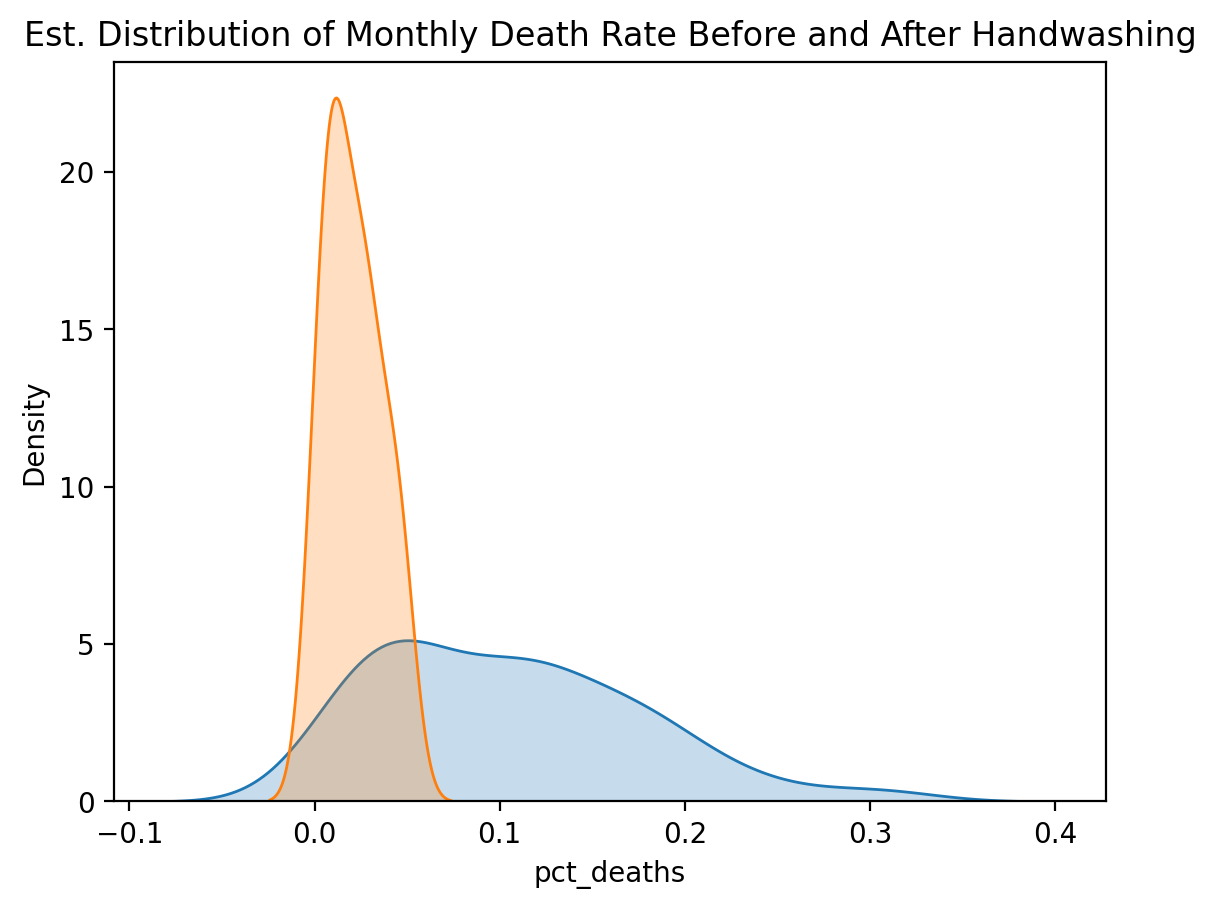

In [78]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, fill=True)
sns.kdeplot(after_washing.pct_deaths, fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

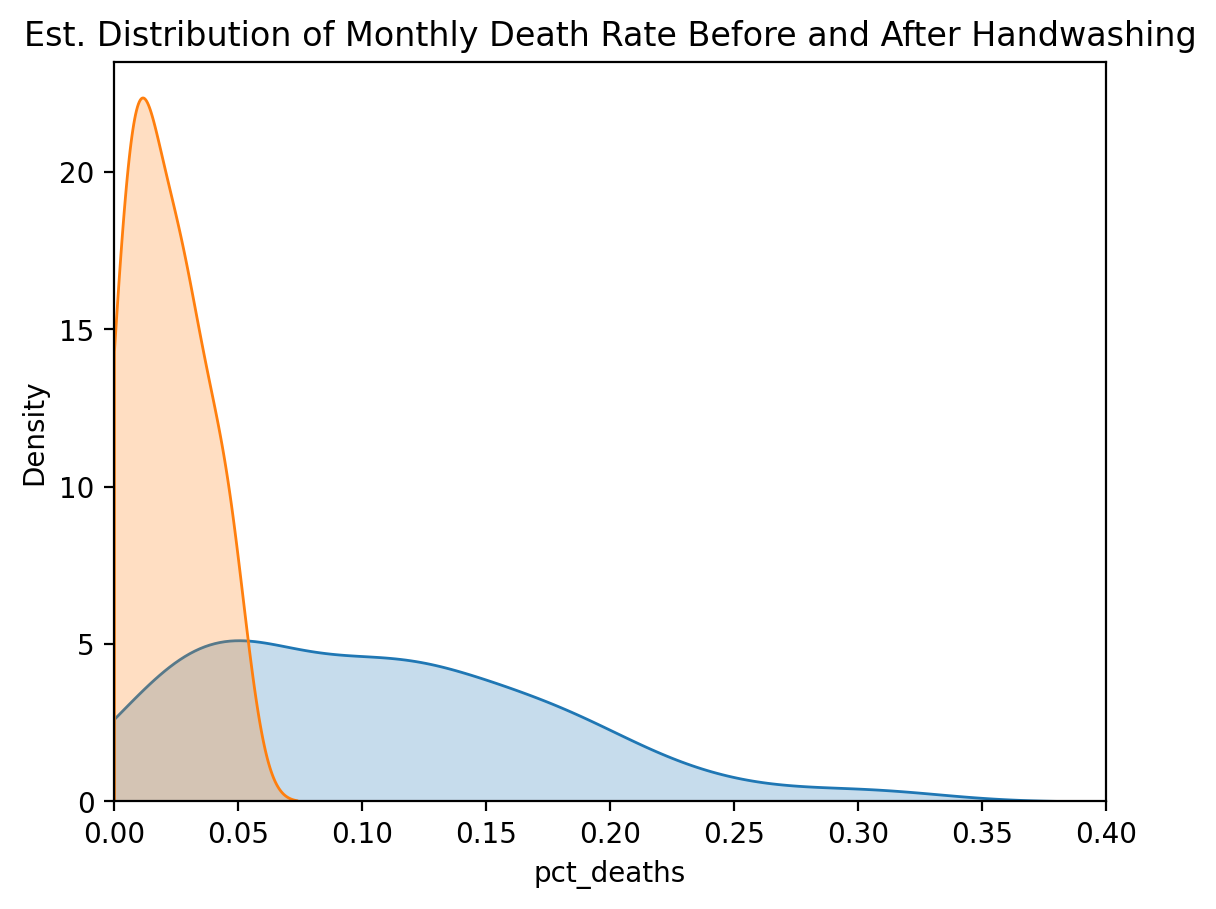

In [79]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            fill=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

### Use a T-Test to Show Statistical Significance

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 



In [80]:
import scipy.stats as stats

In [81]:
t_stat, p_value = stats.ttest_ind(a = before_washing.pct_deaths, 
                                  b = after_washing.pct_deaths)
print(f'p-value is {p_value:.10f}')
print(f't-statistic is {t_stat:.4}')

p-value is 0.0000002985
t-statistic is 5.512


## When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper